# Initial data exploration

Taking a preliminary look at the basic nuances of the data before diving into models.
the data set is pretty rich in size and completenes so we're already off to a good start

1. 
	a) How many users are in this dataset? 
		500763
	
	b) What percentage of users appear both as a player and a subject?
		0.054%

2. How often do players like people outside of their declared preferences? (please see charts below)


### notable observations:
- certainly some collinearity in the data: subject_saved, play_saved, etc. otherwise, some collinearity across the board but not much.

Preferences --
- Most of likers seem to be comprised of straight males

- Overall height seems to be the least forgiving criteria, then age, then distance. Though since the cohort of "likes" seems to be male dominated it makes sense to take a more granular view of each gender seperately. This is a clear example of simpson's paradox.

- males cared more about the age min

- females were less forgiving on height max and more linient on age min

- gender orientation:
MS seemed to like the most outside of thier preferences here, though it's mostly influenced by FB. That is, straight men don't seem to mind as much.

- next time around I'd throwout the people with default values to see what 
1. proportion of people care to change the preference from default 
2. the value they change it to 
3. out of the people that cared enough to change their preference settings how often did the "like" outside of it.

_*caveat: can't make any pervasive statement about entire populations through the exercise, observations are solely confined to this dataset_

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import pandas as pd
from helpers import missing_values_finder, magnify

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
sns.set_context("poster")
%pylab inline

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [3]:
df_ratings_sample = pd.read_csv('ratings_sample.tsv', sep='\t')
print (df_ratings_sample.shape)
!date

(500763, 30)
Wed Oct 11 21:48:20 EDT 2017


# No null fields

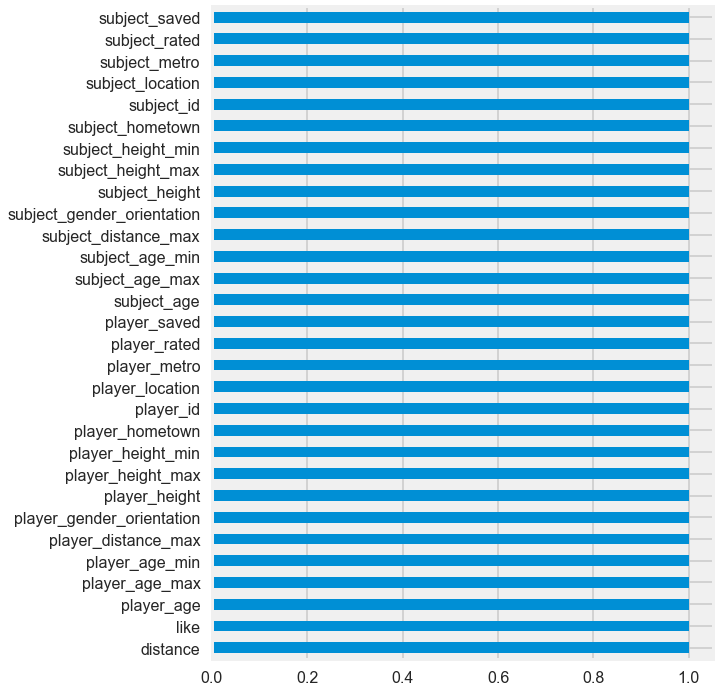

In [4]:
missing_values_finder(df_ratings_sample).plot(legend=False, kind='barh', figsize=(8,12));

In [5]:
df_ratings_sample.ix[1].T

like                                                                 0
player_id                     8273b4e96e0a1c2dba27e648c58c188489fab7f4
subject_id                    a4bdbd52034a4da46b38fce744a18314c91126ba
player_age                                                          28
player_height                                                      160
player_age_max                                                      34
player_age_min                                                      27
player_distance_max                                                 38
player_height_min                                                   92
player_height_max                                                  214
subject_age                                                         29
subject_height                                                     170
subject_age_max                                                     30
subject_age_min                                                     21
subjec

# Distributions and correlations

A very quick and easy way would be to inspect a scatter matrix but would be too much computation. Among the numerical variables, examining the pearson correlation could give us an initial starting point for features.

Though, inspecting it doesn't seem to be too many notable features being linearly correlated.


In [6]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr = df_ratings_sample.corr('pearson')
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

# Answers to initial set of questions

- How many users are in this dataset?
- What percentage of users appear both as a player and a subject?


In [7]:
players_and_subjects_union = set(df_ratings_sample.player_id + df_ratings_sample.subject_id)
print (len(players_and_subjects_union))

players_and_subjects_intersection = set(df_ratings_sample.player_id) & set(df_ratings_sample.subject_id)

print (len(players_and_subjects_intersection)/float(len(players_and_subjects_union)))

500763
0.005461665498449366


- How often do players like people outside of their declared preferences?


age         0.055734
distance    0.160537
height      0.006837
Name: liked_outside_of_preferences, dtype: float64

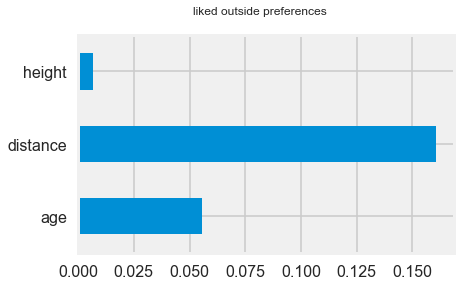

In [8]:
df_ratings_sample_likes = df_ratings_sample[df_ratings_sample.like == 1.0]

mask = (df_ratings_sample_likes.subject_age > df_ratings_sample_likes.player_age_max) | \
    (df_ratings_sample_likes.subject_age < df_ratings_sample_likes.player_age_min)
pct_of_likes_outside_preferences_age = df_ratings_sample_likes[mask].shape[0]/df_ratings_sample_likes.shape[0]

mask = (df_ratings_sample_likes.distance > df_ratings_sample_likes.player_distance_max)
pct_of_likes_outside_preferences_distance = df_ratings_sample_likes[mask].shape[0]/df_ratings_sample_likes.shape[0]


mask = (df_ratings_sample_likes.subject_height > df_ratings_sample_likes.player_height_max ) | \
    (df_ratings_sample_likes.subject_height < df_ratings_sample_likes.player_height_min)
pct_of_likes_outside_preferences_height = df_ratings_sample_likes[mask].shape[0]/df_ratings_sample_likes.shape[0]

likes_outside_preferences = pd.Series( [pct_of_likes_outside_preferences_age, pct_of_likes_outside_preferences_distance, pct_of_likes_outside_preferences_height], name='liked_outside_of_preferences')
likes_outside_preferences.index = ['age', 'distance', 'height']

likes_outside_preferences.plot(kind='barh')
plt.suptitle('liked outside preferences')
likes_outside_preferences


# A more granular view

this was necessary considering the dominant proportion of males

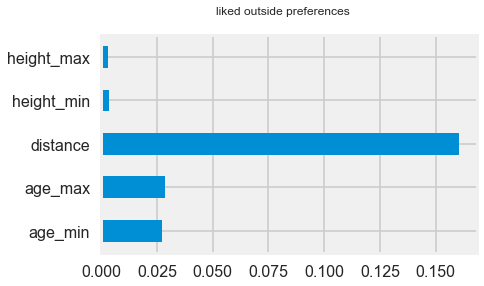

In [9]:
df_ratings_sample_likes = df_ratings_sample[df_ratings_sample.like == 1.0]

mask = (df_ratings_sample_likes.subject_age > df_ratings_sample_likes.player_age_max) 
pct_of_likes_outside_preferences_age_max = df_ratings_sample_likes[mask].shape[0]/df_ratings_sample_likes.shape[0]

mask = df_ratings_sample_likes.subject_age < df_ratings_sample_likes.player_age_min
pct_of_likes_outside_preferences_age_min = df_ratings_sample_likes[mask].shape[0]/df_ratings_sample_likes.shape[0]

mask = (df_ratings_sample_likes.distance > df_ratings_sample_likes.player_distance_max)
pct_of_likes_outside_preferences_distance = df_ratings_sample_likes[mask].shape[0]/df_ratings_sample_likes.shape[0]

mask = df_ratings_sample_likes.subject_height > df_ratings_sample_likes.player_height_max
pct_of_likes_outside_preferences_height_max = df_ratings_sample_likes[mask].shape[0]/df_ratings_sample_likes.shape[0]

mask = df_ratings_sample_likes.subject_height < df_ratings_sample_likes.player_height_min
pct_of_likes_outside_preferences_height_min = df_ratings_sample_likes[mask].shape[0]/df_ratings_sample_likes.shape[0]

prefs = [
    pct_of_likes_outside_preferences_age_min, 
    pct_of_likes_outside_preferences_age_max, 
    pct_of_likes_outside_preferences_distance, 
    pct_of_likes_outside_preferences_height_min,
    pct_of_likes_outside_preferences_height_max
]

likes_outside_preferences = pd.Series(prefs , name='liked_outside_of_preferences')
likes_outside_preferences.index = ['age_min', 'age_max',  'distance', 'height_min', 'height_max']

likes_outside_preferences.plot(kind='barh')
plt.suptitle('liked outside preferences')

# Most of the players are male

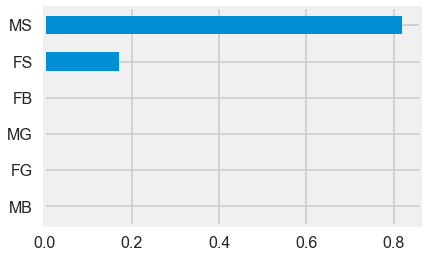

In [10]:
df_ratings_sample_likes.player_gender_orientation.value_counts(1).sort_values().plot(kind='barh')

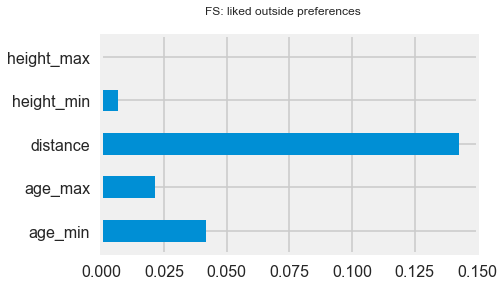

In [11]:
df_ratings_sample_likes = df_ratings_sample[(df_ratings_sample.like == 1.0) & \
                                           (df_ratings_sample.player_gender_orientation == 'FS')]

mask = (df_ratings_sample_likes.subject_age > df_ratings_sample_likes.player_age_max) 
pct_of_likes_outside_preferences_age_max = df_ratings_sample_likes[mask].shape[0]/df_ratings_sample_likes.shape[0]

mask = df_ratings_sample_likes.subject_age < df_ratings_sample_likes.player_age_min
pct_of_likes_outside_preferences_age_min = df_ratings_sample_likes[mask].shape[0]/df_ratings_sample_likes.shape[0]

mask = (df_ratings_sample_likes.distance > df_ratings_sample_likes.player_distance_max)
pct_of_likes_outside_preferences_distance = df_ratings_sample_likes[mask].shape[0]/df_ratings_sample_likes.shape[0]

mask = df_ratings_sample_likes.subject_height > df_ratings_sample_likes.player_height_max
pct_of_likes_outside_preferences_height_max = df_ratings_sample_likes[mask].shape[0]/df_ratings_sample_likes.shape[0]

mask = df_ratings_sample_likes.subject_height < df_ratings_sample_likes.player_height_min
pct_of_likes_outside_preferences_height_min = df_ratings_sample_likes[mask].shape[0]/df_ratings_sample_likes.shape[0]

prefs = [
    pct_of_likes_outside_preferences_age_min, 
    pct_of_likes_outside_preferences_age_max, 
    pct_of_likes_outside_preferences_distance, 
    pct_of_likes_outside_preferences_height_min,
    pct_of_likes_outside_preferences_height_max
]

likes_outside_preferences = pd.Series(prefs , name='liked_outside_of_preferences')
likes_outside_preferences.index = ['age_min', 'age_max',  'distance', 'height_min', 'height_max']

likes_outside_preferences.plot(kind='barh')
plt.suptitle('FS: liked outside preferences')

# What propotion are the default for max height?

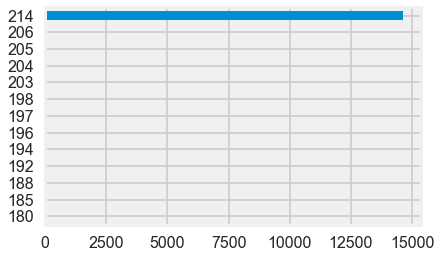

In [12]:
df_ratings_sample_likes.player_height_max.value_counts().sort_index().plot('barh')

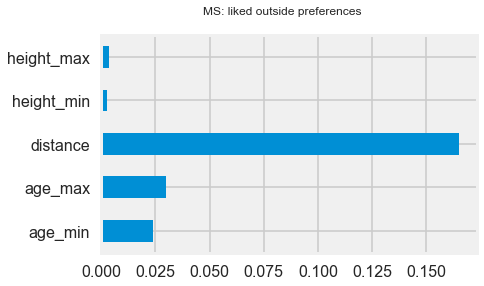

In [13]:
df_ratings_sample_likes = df_ratings_sample[(df_ratings_sample.like == 1.0) & \
                                           (df_ratings_sample.player_gender_orientation == 'MS')]

mask = (df_ratings_sample_likes.subject_age > df_ratings_sample_likes.player_age_max) 
pct_of_likes_outside_preferences_age_max = df_ratings_sample_likes[mask].shape[0]/df_ratings_sample_likes.shape[0]

mask = df_ratings_sample_likes.subject_age < df_ratings_sample_likes.player_age_min
pct_of_likes_outside_preferences_age_min = df_ratings_sample_likes[mask].shape[0]/df_ratings_sample_likes.shape[0]

mask = (df_ratings_sample_likes.distance > df_ratings_sample_likes.player_distance_max)
pct_of_likes_outside_preferences_distance = df_ratings_sample_likes[mask].shape[0]/df_ratings_sample_likes.shape[0]

mask = df_ratings_sample_likes.subject_height > df_ratings_sample_likes.player_height_max
pct_of_likes_outside_preferences_height_max = df_ratings_sample_likes[mask].shape[0]/df_ratings_sample_likes.shape[0]

mask = df_ratings_sample_likes.subject_height < df_ratings_sample_likes.player_height_min
pct_of_likes_outside_preferences_height_min = df_ratings_sample_likes[mask].shape[0]/df_ratings_sample_likes.shape[0]

prefs = [
    pct_of_likes_outside_preferences_age_min, 
    pct_of_likes_outside_preferences_age_max, 
    pct_of_likes_outside_preferences_distance, 
    pct_of_likes_outside_preferences_height_min,
    pct_of_likes_outside_preferences_height_max
]

likes_outside_preferences = pd.Series(prefs , name='liked_outside_of_preferences')
likes_outside_preferences.index = ['age_min', 'age_max',  'distance', 'height_min', 'height_max']

likes_outside_preferences.plot(kind='barh')
plt.suptitle('MS: liked outside preferences')

# Default values causing a bit of noise

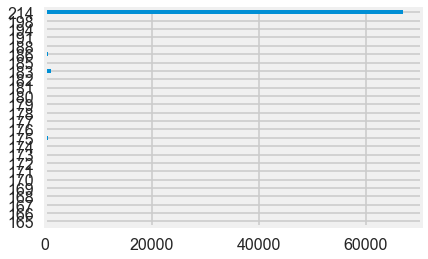

In [14]:
df_ratings_sample_likes.player_height_max.value_counts().sort_index().plot('barh')

# outside gender preferences

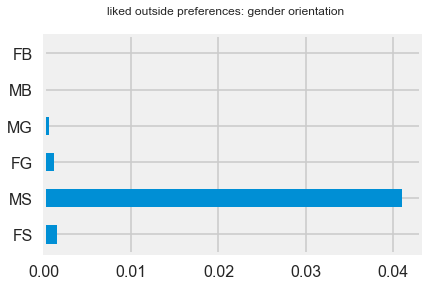

In [15]:
df_ratings_sample_likes = df_ratings_sample[df_ratings_sample.like == 1.0] 

mask=(df_ratings_sample_likes.player_gender_orientation == 'FS') & (df_ratings_sample_likes.subject_gender_orientation != 'MS')
pct_of_likes_outside_preferences_FS = df_ratings_sample_likes[mask].shape[0]/df_ratings_sample_likes.shape[0]

mask=(df_ratings_sample_likes.player_gender_orientation == 'MS') & (df_ratings_sample_likes.subject_gender_orientation != 'FS')
pct_of_likes_outside_preferences_MS = df_ratings_sample_likes[mask].shape[0]/df_ratings_sample_likes.shape[0]

mask=(df_ratings_sample_likes.player_gender_orientation == 'FG') & (df_ratings_sample_likes.subject_gender_orientation != 'FG')
pct_of_likes_outside_preferences_FG = df_ratings_sample_likes[mask].shape[0]/df_ratings_sample_likes.shape[0]

mask=(df_ratings_sample_likes.player_gender_orientation == 'MG') & (df_ratings_sample_likes.subject_gender_orientation != 'MG')
pct_of_likes_outside_preferences_MG = df_ratings_sample_likes[mask].shape[0]/df_ratings_sample_likes.shape[0]

mask=(df_ratings_sample_likes.player_gender_orientation == 'MB') & (~df_ratings_sample_likes.subject_gender_orientation.isin({'MG','MB','FS'}))
pct_of_likes_outside_preferences_MB = df_ratings_sample_likes[mask].shape[0]/df_ratings_sample_likes.shape[0]

mask=(df_ratings_sample_likes.player_gender_orientation == 'FB') & (~df_ratings_sample_likes.subject_gender_orientation.isin({'FG','FB','MS'}))
pct_of_likes_outside_preferences_FB = df_ratings_sample_likes[mask].shape[0]/df_ratings_sample_likes.shape[0]


prefs = [
    pct_of_likes_outside_preferences_FS, 
    pct_of_likes_outside_preferences_MS, 
    pct_of_likes_outside_preferences_FG, 
    pct_of_likes_outside_preferences_MG,
    pct_of_likes_outside_preferences_MB,
    pct_of_likes_outside_preferences_FB
]

likes_outside_preferences = pd.Series(prefs , name='liked_outside_of_preferences')
likes_outside_preferences.index = ['FS', 'MS', 'FG', 'MG', 'MB', 'FB']

likes_outside_preferences.plot(kind='barh')
plt.suptitle('liked outside preferences: gender orientation')


In [16]:
df_gender_orientation_likes = df_ratings_sample_likes.groupby(['player_gender_orientation','subject_gender_orientation']).count()['like']
df_gender_orientation_likes

player_gender_orientation  subject_gender_orientation
FB                         FB                               11
                           FG                               10
                           FS                                5
                           MB                                2
                           MS                              444
FG                         FB                               24
                           FG                               21
                           FS                                2
                           MS                               69
FS                         FG                                1
                           FS                               91
                           MB                               28
                           MG                                5
                           MS                            14829
MB                         FB                                1
 